## Optimizers basics


Optimization is at the heart of machine learning and AI models, as it involves finding the best parameters for a model to minimize (or maximize) a certain objective function. Let's break down three main types of optimization techniques and how they are used in AI/ML:

1. Convex Optimization:
Convex optimization is a subfield of optimization where the objective function is convex, meaning it has a single global minimum. This property makes it easier to solve because any local minimum will also be the global minimum.

Usage in AI/ML: Many machine learning algorithms, like Linear Regression and Support Vector Machines (SVM), involve solving convex optimization problems. Gradient-based methods, like Gradient Descent, are often used to minimize convex loss functions, such as the Mean Squared Error (MSE) in regression.

2. Constrained Optimization:
Constrained optimization involves optimizing an objective function subject to some constraints (e.g., equality or inequality constraints).

Usage in AI/ML: Constrained optimization is used when the model needs to meet certain criteria, such as in logistic regression with regularization, where we optimize the loss function while imposing a constraint on the model's complexity (e.g., L1/L2 regularization).

3. Lagrange Multipliers:
Lagrange multipliers are a method to solve constrained optimization problems. It introduces a new variable (the Lagrange multiplier) for each constraint, transforming the constrained problem into an unconstrained one, which can be easier to solve.

Usage in AI/ML: Lagrange multipliers can be applied in cases where we want to enforce specific conditions or constraints in a machine learning model, such as support vector machines with a margin constraint.


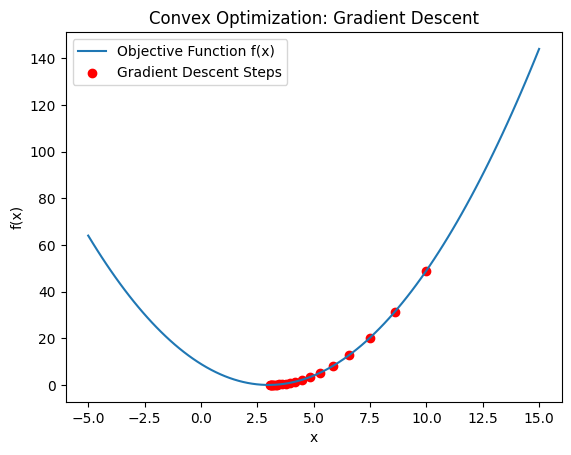

Final value of x: 3.0807045053224793


In [4]:
## 1. Convex Optimization with Gradient Descent

import numpy as np
import matplotlib.pyplot as plt

# Objective function: f(x) = (x - 3)^2
def objective_function(x):
    return (x - 3)**2

# Gradient of the function: df/dx = 2(x - 3)
def gradient(x):
    return 2 * (x - 3)

# Gradient Descent Algorithm
def gradient_descent(start_x, learning_rate, iterations):
    x = start_x
    history = [x]

    for _ in range(iterations):
        x = x - learning_rate * gradient(x)
        history.append(x)

    return x, history

# Parameters
start_x = 10 # random
learning_rate = 0.1
iterations = 20

# Perform Gradient Descent
final_x, history = gradient_descent(start_x, learning_rate, iterations)

# Plot the results
x_values = np.linspace(-5, 15, 100)
y_values = objective_function(x_values)

plt.plot(x_values, y_values, label="Objective Function f(x)")
plt.scatter(history, [objective_function(x) for x in history], color='red', label="Gradient Descent Steps")
plt.title("Convex Optimization: Gradient Descent")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

print(f"Final value of x: {final_x}")


In [7]:
# Constrained Optimization Using Scipy

from scipy.optimize import minimize

# Objective function: f(x, y) = x^2 + y^2
def objective(xy):
    x, y = xy
    return x**2 + y**2

# Constraint: x + y = 1
def constraint(xy):
    return xy[0] + xy[1] - 1

# Define the constraint in a dictionary format
constr = {'type': 'eq', 'fun': constraint}

# Initial guess
x0 = [0.1, 0.1]

# Minimize the function
solution = minimize(objective, x0, constraints=[constr])

print(f"Solution: x = {solution.x[0]}, y = {solution.x[1]}")

Solution: x = 0.5, y = 0.4999999999999998


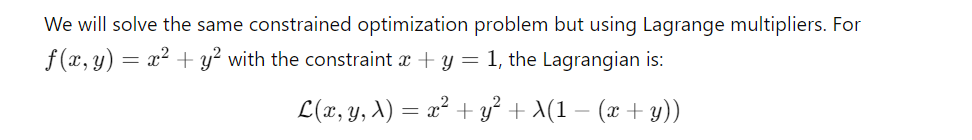

Summary of Key Steps:

Transform the constrained problem: We introduce the Lagrange multiplier and combine the objective function and constraint into a single Lagrangian function.

Stationary conditions: Take partial derivatives with respect to each variable and set them to zero.

Solve the system of equations: Solve for
𝑥,
𝑦, and
𝜆
using the system of equations obtained from the derivatives.


The method of Lagrange multipliers converts a constrained optimization problem into a system of equations, which can be solved more easily.

In this example, the constraint
𝑥
+
𝑦
=
1
 is automatically satisfied when we solve the system of equations, allowing us to treat the problem as effectively "unconstrained."

In [8]:
import sympy as sp

# Define the symbols
x, y, lam = sp.symbols('x y lam')

# Define the objective function and the constraint
objective = x**2 + y**2
constraint = 1 - (x + y)

# Define the Lagrangian
L = objective + lam * constraint

# Take partial derivatives
L_x = sp.diff(L, x)
L_y = sp.diff(L, y)
L_lam = sp.diff(L, lam)

# Solve the system of equations
solution = sp.solve([L_x, L_y, L_lam], (x, y, lam))

print(f"Solution: x = {solution[x]}, y = {solution[y]}, lambda = {solution[lam]}")


Solution: x = 1/2, y = 1/2, lambda = 1


## Gradient Descent

What is Gradient Descent?


Gradient Descent is an optimization algorithm used to minimize a function by iteratively moving towards the steepest descent (the negative gradient) of the function. It is widely used in machine learning to optimize model parameters like weights in neural networks.

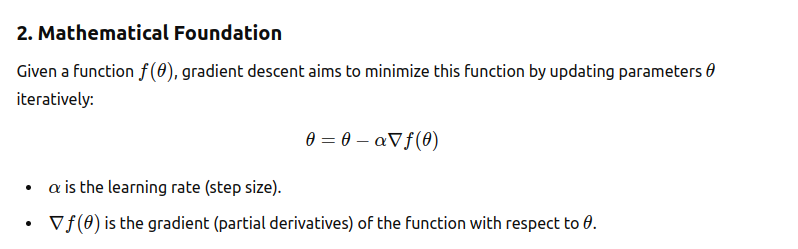

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate random dataset
np.random.seed(42)  # For reproducibility
X = np.random.uniform(0, 100, 100)  # 100 random values for X between 0 and 100

# True linear relationship (Y = 1.5 * X + 2) with noise
true_w = 1.5  # True weight
true_b = 2    # True bias
noise = np.random.normal(0, 10, X.shape)  # Adding noise to make data more realistic
Y = true_w * X + true_b + noise  # Target values

# 2. Gradient Descent Parameters
alpha = 0.0001  # Learning rate (adjusted for larger data)
iterations = 1000  # Number of iterations
n = len(X)  # Number of data points

# Initialize parameters (weights and bias)
w = 0.0  # Initial weight
b = 0.0  # Initial bias


In [ ]:
def gradient_descent(X,Y,w,b,alpha, iterations):
    history = []
    for i in range(iterations):
        y_pred = w*X + b
        # Compute gradients
        dw = (2/n) * np.dot(X, (y_pred - Y))  # Derivative w.r.t. weight
        db = (2/n) * np.sum(y_pred - Y)       # Derivative w.r.t. bias

        # Update weights and bias
        w = w - alpha * dw
        b = b - alpha * db

        # Calculate and record loss (MSE)
        loss = (1/n) * np.sum((y_pred - Y) ** 2)
        history.append(loss)

        # Optional: print loss at certain intervals
        if i % 10 == 0:
            print(f"Iteration {i}: Loss = {loss}, w = {w}, b = {b}")

    return w,b,history

Iteration 0: Loss = 7191.612827118594, w = 0.9367036799888635, b = 0.014503261581011563
Iteration 10: Loss = 85.48928362886532, w = 1.5168247312515897, b = 0.025682837351727973
Iteration 20: Loss = 85.48377138747408, w = 1.5168279546982868, b = 0.028024068515202748
Iteration 30: Loss = 85.47829727614199, w = 1.5167923222562092, b = 0.030363379419737956
Iteration 40: Loss = 85.47282937495282, w = 1.5167567074278274, b = 0.0327013629844974
Iteration 50: Loss = 85.46736767686126, w = 1.5167211128067455, b = 0.035038020002260514
Iteration 60: Loss = 85.46191217483015, w = 1.5166855383816729, b = 0.037373351225698605
Iteration 70: Loss = 85.45646286183027, w = 1.5166499841411505, b = 0.03970735740705328
Iteration 80: Loss = 85.45101973084057, w = 1.516614450073726, b = 0.0420400392981393
Iteration 90: Loss = 85.44558277484775, w = 1.516578936167953, b = 0.044371397650344875
Iteration 100: Loss = 85.44015198684657, w = 1.5165434424123923, b = 0.046701433214631875
Iteration 110: Loss = 85.434

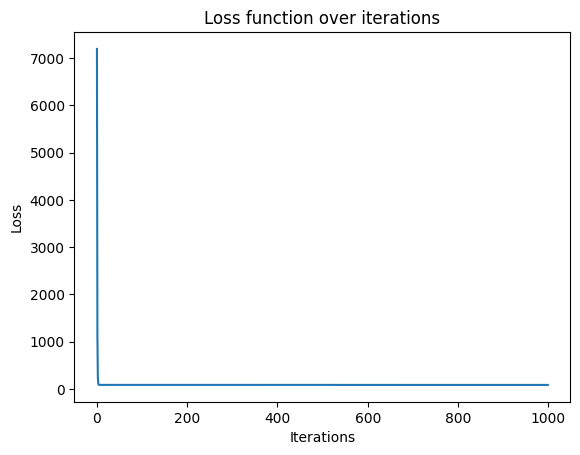

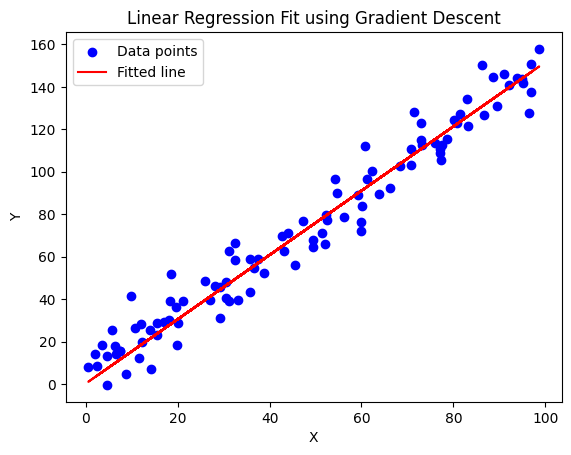

In [ ]:
# 4. Run Gradient Descent
final_w, final_b, loss_history = gradient_descent(X, Y, w, b, alpha, iterations)

# Print final parameters
print(f"\nFinal parameters: w = {final_w}, b = {final_b}")

# 5. Plotting the loss history
plt.plot(range(iterations), loss_history)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss function over iterations")
plt.show()

# 6. Plotting the data points and the regression line
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, final_w * X + final_b, color='red', label='Fitted line')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Linear Regression Fit using Gradient Descent")
plt.show()

Final weights (GD): [[2.92727972]], Final bias (GD): [[4.03709389]]


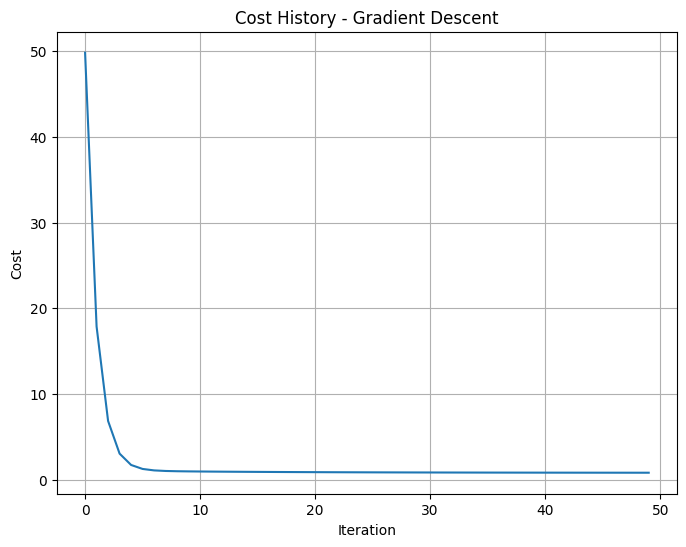

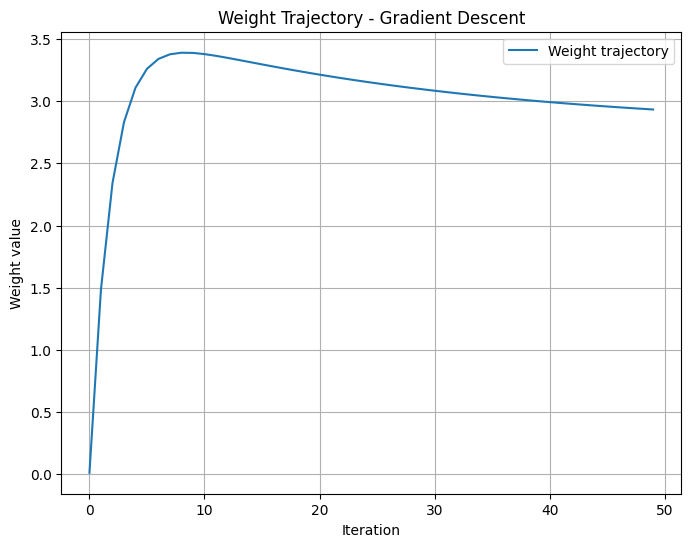

In [22]:
## New example

import numpy as np
import matplotlib.pyplot as plt

# Helper functions to plot cost and weight trajectories
def plot_cost(cost_history, title):
    plt.figure(figsize=(8, 6))
    plt.plot(cost_history)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Cost")
    plt.grid(True)
    plt.show()

def plot_weight_trajectory(weight_history, title):
    plt.figure(figsize=(8, 6))
    plt.plot(weight_history, label="Weight trajectory")
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("Weight value")
    plt.grid(True)
    plt.legend()
    plt.show()

# Data for a simple linear regression
np.random.seed(42)
m = 100  # number of samples
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Parameters
learning_rate = 0.1
n_epochs = 50
batch_size = 10

# Gradient Descent
w = np.random.randn(1, 1)
b = np.zeros((1, 1))
cost_history_gd = []
weight_history_gd = []

for epoch in range(n_epochs):
    y_pred = X.dot(w) + b
    error = y_pred - y
    cost = (1/m) * np.sum(error ** 2)
    cost_history_gd.append(cost)
    weight_history_gd.append(w[0, 0])  # Store the weight at each step
    w_gradient = (2/m) * X.T.dot(error)
    b_gradient = (2/m) * np.sum(error)
    w -= learning_rate * w_gradient
    b -= learning_rate * b_gradient
print(f"Final weights (GD): {w}, Final bias (GD): {b}")
plot_cost(cost_history_gd, "Cost History - Gradient Descent")
plot_weight_trajectory(weight_history_gd, "Weight Trajectory - Gradient Descent")

## Stochastic Gradient Descent


Instead of calculating the gradient for the entire dataset in every iteration, SGD updates the parameters for each individual training example, making it faster but noisier.

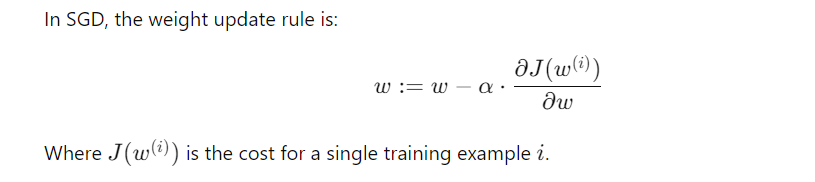

Here's a concise explanation of the key differences between basic gradient descent and stochastic gradient descent:

Data usage:

Basic gradient descent: Uses the entire dataset to compute the gradient in each iteration.

Stochastic gradient descent (SGD): Uses a single randomly selected data point to compute the gradient in each iteration.


Update frequency:

Basic: Updates parameters once per epoch (full pass through the dataset).

SGD: Updates parameters after each data point.


Computation speed:

Basic: Slower, especially with large datasets.

SGD: Faster, as it processes one data point at a time.


Convergence:

Basic: Smoother convergence, potentially to a better minimum.

SGD: Noisier convergence, but can escape local minima more easily.


Memory requirements:

Basic: Higher, as it needs to store the entire dataset in memory.

SGD: Lower, as it only needs one data point at a time.





In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Hyperparameters
learning_rate = 0.01
n_iterations = 1000
m = len(X)

In [17]:
# Re-initialize weights
w = np.random.randn(1, 1)
b = np.zeros((1, 1))

<ipython-input-25-d01ada0eae68>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost = float(error**2)


Final weights (SGD): [[2.96811741]], Final bias (SGD): [[4.1699862]]


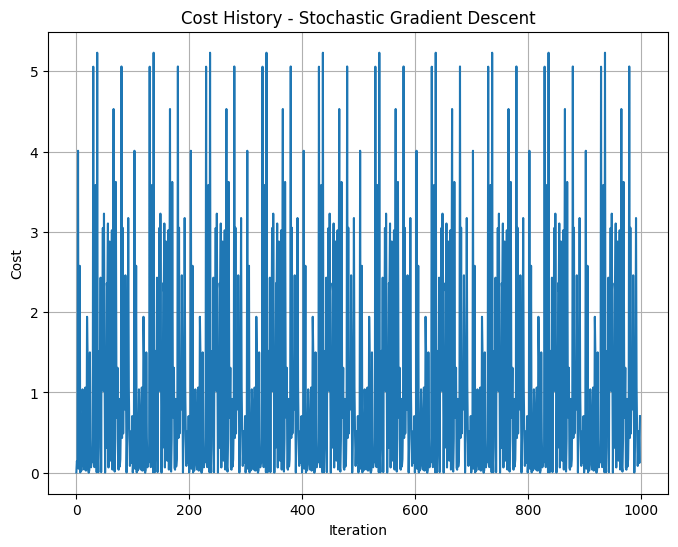

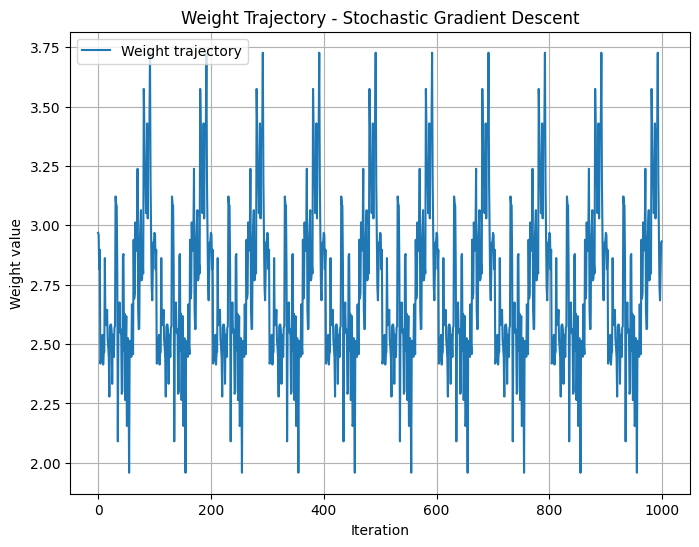

In [25]:
# Store the cost to visualize convergence
cost_history_sgd = []
weight_history_sgd = []

# Stochastic Gradient Descent
n_epochs = 10

for epoch in range(n_epochs):
    for i in range(m):
        xi = X[i:i+1]
        yi = y[i:i+1]

        y_pred = xi.dot(w) + b
        error = y_pred - yi
        cost = float(error**2)
        cost_history_sgd.append(cost)

        weight_history_sgd.append(w[0, 0])

        w_gradient = 2*xi.T.dot(error)
        b_gradient = 2*float(np.sum(error))

        w = w - learning_rate*w_gradient
        b = b - learning_rate*b_gradient

print(f"Final weights (SGD): {w}, Final bias (SGD): {b}")

plot_cost(cost_history_sgd, "Cost History - Stochastic Gradient Descent")
plot_weight_trajectory(weight_history_sgd, "Weight Trajectory - Stochastic Gradient Descent")



## Mini Batch Gradient Descent

Mini-batch gradient descent is a compromise between full batch gradient descent and stochastic gradient descent. It updates the model based on small batches of data, providing a balance between computational efficiency and convergence stability.

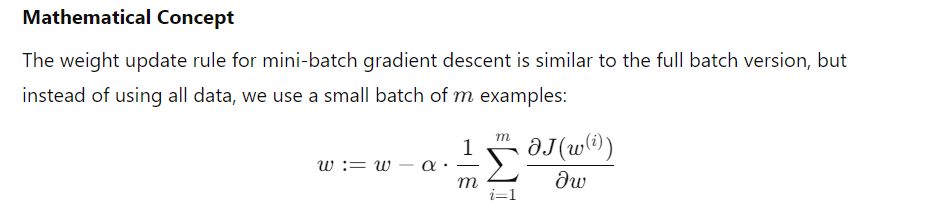

There are a few key differences between stochastic gradient descent (SGD) and mini-batch gradient descent:

Batch size:


SGD uses a batch size of 1, updating the model parameters after each individual training example.

Mini-batch gradient descent uses a batch size larger than 1 but smaller than the full dataset, typically in the range of 32 to 256 examples.


Update frequency:


SGD updates the model parameters more frequently, after every single example.

Mini-batch GD updates less frequently, after processing each mini-batch.


Computational efficiency:


SGD can be computationally inefficient, especially with large datasets, as it doesn't take advantage of vectorized operations.

Mini-batch GD is more efficient as it can leverage matrix operations on the mini-batches.


Convergence behavior:


SGD tends to have higher variance in parameter updates, which can lead to more noisy convergence.

Mini-batch GD typically has a smoother convergence due to averaging gradients over multiple examples.


Learning rate sensitivity:


SGD is often more sensitive to learning rate settings due to its higher update frequency and variance.

Mini-batch GD can be more stable with respect to learning rate choices.


Memory usage:


SGD has very low memory requirements since it only processes one example at a time.

Mini-batch GD requires more memory to store and process multiple examples simultaneously.

In [28]:
# Re-initialize weights
w = np.random.randn(1, 1)
b = np.zeros((1, 1))
m =100
batch_size = 10
n_batches = int(m / batch_size)

In [29]:
cost_history_mini_batch = []
weight_history_mini_batch = []

Final weights (Mini-Batch): [[2.77846146]], Final bias (Mini-Batch): [[4.18417673]]


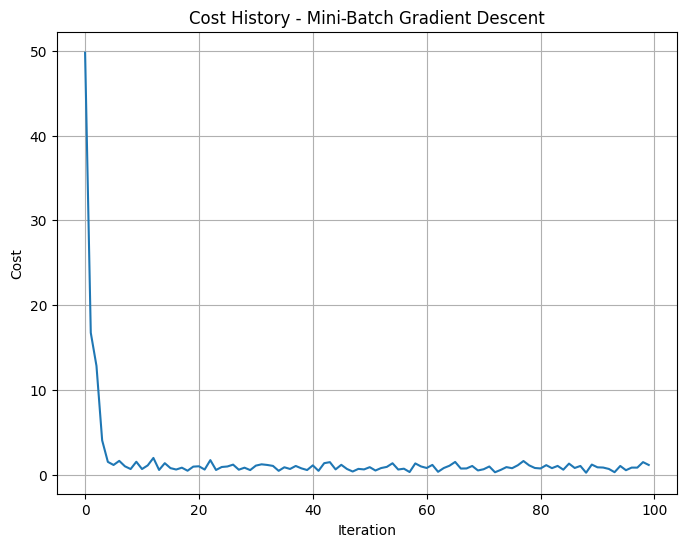

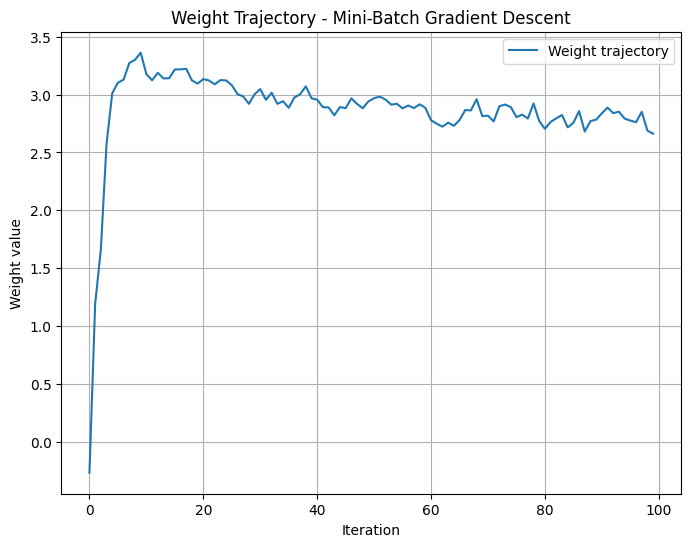

In [30]:
for epoch in range(n_epochs):
    indices = np.random.permutation(m)
    X_shuffled = X[indices]
    y_shuffled = y[indices]
    for i in range(0, m, batch_size):
        X_batch = X_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        y_pred = X_batch.dot(w) + b
        error = y_pred - y_batch
        cost = (1/batch_size) * np.sum(error ** 2)
        cost_history_mini_batch.append(cost)
        weight_history_mini_batch.append(w[0, 0])
        w_gradient = (2/batch_size) * X_batch.T.dot(error)
        b_gradient = (2/batch_size) * np.sum(error)
        w -= learning_rate * w_gradient
        b -= learning_rate * b_gradient

print(f"Final weights (Mini-Batch): {w}, Final bias (Mini-Batch): {b}")
plot_cost(cost_history_mini_batch, "Cost History - Mini-Batch Gradient Descent")
plot_weight_trajectory(weight_history_mini_batch, "Weight Trajectory - Mini-Batch Gradient Descent")


## Adam Optimizer (Adaptive Moment Estimation)

The Adam Optimizer is an advanced version of stochastic gradient descent (SGD) that incorporates momentum and adaptive learning rates for each parameter. It combines the ideas of two other optimizers:

Momentum: Keeps an exponentially decaying average of past gradients to accelerate convergence, especially in the direction of persistent gradients.


RMSProp: Adapts the learning rate for each parameter by keeping an exponentially decaying average of squared gradients.

Adam computes adaptive learning rates for each parameter by maintaining two moving averages:

m: The first moment (mean of gradients).

v: The second moment (uncentered variance of gradients).

Update Rules in Adam:

Compute biased estimates of the first moment (mean of gradients) and second moment (variance of gradients).

Correct these biases.

Update the parameters (weights and biases) using these corrected moments.

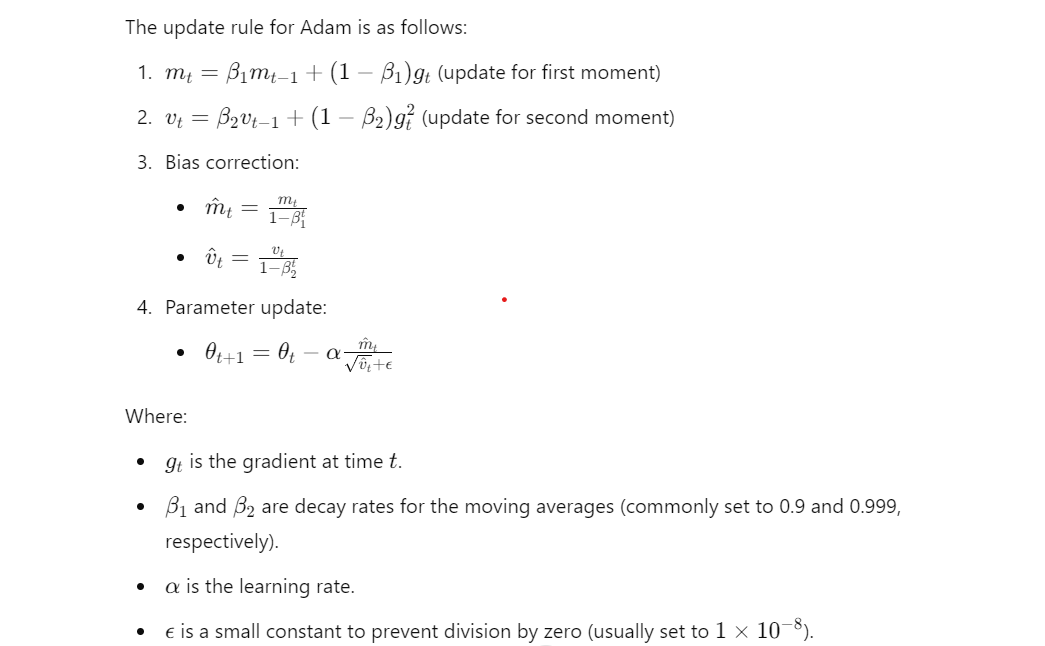

Adam is widely used in deep learning because it tends to converge faster and more efficiently than other optimizers, especially for complex, non-convex optimization problems.

In [31]:
# Data for a simple linear regression
np.random.seed(42)
m = 100  # number of samples
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# Parameters
learning_rate = 0.1
n_epochs = 50
batch_size = 10

# Adam Optimizer
w = np.random.randn(1, 1)
b = np.zeros((1, 1))
beta1, beta2, epsilon = 0.9, 0.999, 1e-8  # Hyperparameters for Adam
m_w, v_w, m_b, v_b = 0, 0, 0, 0  # Initializing moment variables
t = 0  # Time step
cost_history_adam = []
weight_history_adam = []

Final weights (Adam): [[2.77690442]], Final bias (Adam): [[4.21476829]]


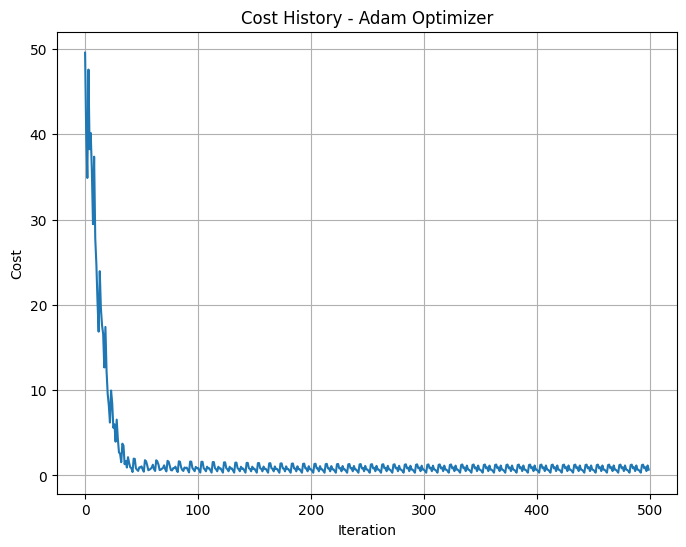

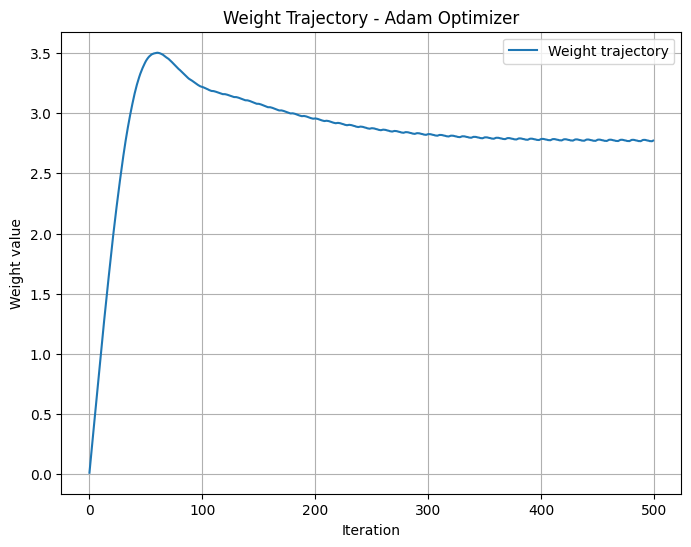

In [32]:
# Adam optimizer implementation
for epoch in range(n_epochs):
    for i in range(0, m, batch_size):
        t += 1
        X_batch = X[i:i+batch_size]
        y_batch = y[i:i+batch_size]
        y_pred = X_batch.dot(w) + b
        error = y_pred - y_batch
        cost = (1/batch_size) * np.sum(error ** 2)
        cost_history_adam.append(cost)
        weight_history_adam.append(w[0, 0])

        # Gradients
        w_gradient = (2/batch_size) * X_batch.T.dot(error)
        b_gradient = (2/batch_size) * np.sum(error)

        # Update biased first and second moments
        m_w = beta1 * m_w + (1 - beta1) * w_gradient
        v_w = beta2 * v_w + (1 - beta2) * (w_gradient ** 2)
        m_b = beta1 * m_b + (1 - beta1) * b_gradient
        v_b = beta2 * v_b + (1 - beta2) * (b_gradient ** 2)

        # Bias-corrected moments
        m_w_hat = m_w / (1 - beta1 ** t)
        v_w_hat = v_w / (1 - beta2 ** t)
        m_b_hat = m_b / (1 - beta1 ** t)
        v_b_hat = v_b / (1 - beta2 ** t)

        # Update weights and bias
        w -= learning_rate * m_w_hat / (np.sqrt(v_w_hat) + epsilon)
        b -= learning_rate * m_b_hat / (np.sqrt(v_b_hat) + epsilon)

# Display results
print(f"Final weights (Adam): {w}, Final bias (Adam): {b}")
plot_cost(cost_history_adam, "Cost History - Adam Optimizer")
plot_weight_trajectory(weight_history_adam, "Weight Trajectory - Adam Optimizer")